In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import set_config
set_config(display = 'diagram')

In [22]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [24]:
X = df.drop(columns= ['Salary'])
y = df['Salary']

Text(0, 0.5, 'Salary')

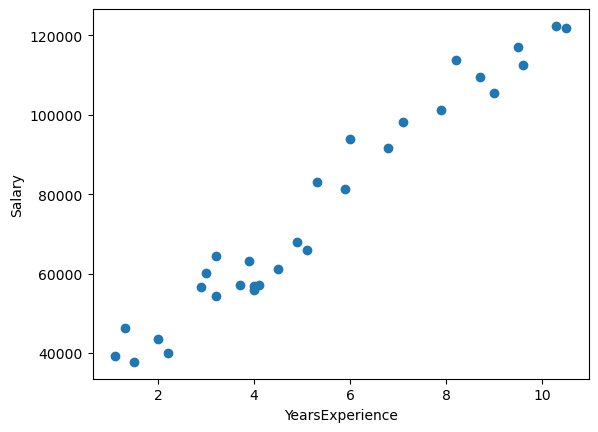

In [25]:
plt.scatter(X, y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [27]:
numeric_feature = X_train.select_dtypes('number').columns

In [28]:
numeric_transformer = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())

In [29]:
 col_transformer = make_column_transformer(
  (numeric_transformer, numeric_feature), 
remainder = 'passthrough')

In [30]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['YearsExperience'], dtype='object'))])

In [31]:
pipe = Pipeline([
    ('col_transformer', col_transformer), 
    ('LinearRegression', LinearRegression()),
])

In [32]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['YearsExperience'], dtype='object'))])),
                ('LinearRegression', LinearRegression())])

In [33]:
from sklearn.model_selection import cross_validate
with_categorical_score = cross_validate(pipe, X_train, y_train, return_train_score = True)

In [34]:
categorical_score = pd.DataFrame(with_categorical_score)
categorical_score

,fit_time,score_time,test_score,train_score
0,0.006996,0.002998,0.983441,0.954236
1,0.000000,0.000000,0.864473,0.971929
2,0.015626,0.000000,0.962291,0.963023
3,0.015625,0.000000,0.994240,0.951343
4,0.015621,0.000000,0.681316,0.976626


In [35]:
categorical_score.mean()

fit_time       0.010774
score_time     0.000600
test_score     0.897152
train_score    0.963431
dtype: float64

In [36]:
pipe.predict(X_test)

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [37]:
pipe.score(X_train, y_train)

0.9645401573418148

In [38]:
pipe.score(X_test, y_test)

0.9024461774180498

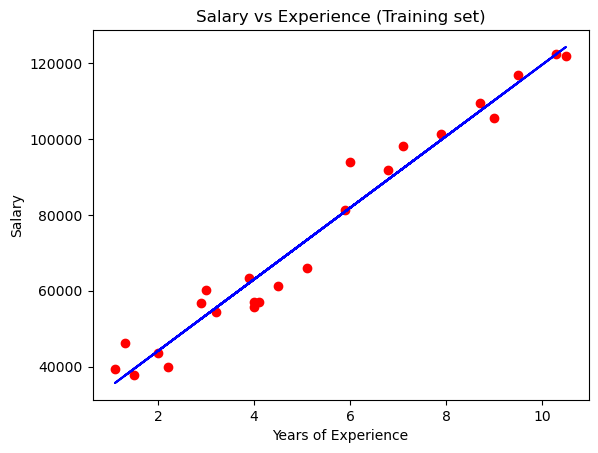

In [39]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, pipe.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

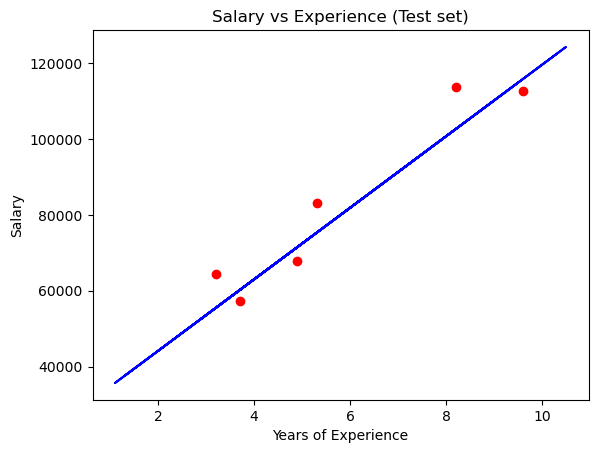

In [40]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(X_train, pipe.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()